# Exploratory Data Analysis for PIMA Indians Diabetes Data

In [1]:
# Import the required packages
import numpy as np   # Provides single and multi-dimensional arrays
import pandas as pd  # Provides DataFrames for easy data manipulations and statstical functions
import matplotlib.pyplot as plt  # Provides several functions for plotting various graphs
% matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data file
data = pd.read_csv('diabetes.csv')

## Exploratory Data Analysis

In [3]:
data.info()
# There are 768 rows amd 9 columns
# There are no null values in any of the columns.
# All features are numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1]:
# Reconfirming that there are no null values
data.isnull().sum().sum()

NameError: name 'data' is not defined

In [5]:
# Get the five point summary of all the columns with numeric values
data.describe()

# Pregnancies: The average no of pregnancies is 3. 17 seems too high, but no evidence to refute this number.
# Normal Glucose Levels: Average GL is 120, which is in the normal range of 110-140. 0s are missing data.
# BloodPressure: Avg Diastolic Levels is 69, which is within the normal range of 60-80. 0s are missing data
# Normal Triceps skin fold measurements: Avg is 20, Normal 18 mm. Decreases with progression of disease. 0s are missing data.
# Insulin: No fixed normal Insulin Ranges. 0s are missing data & max value seems incorrect.
# BMI: Mean BMI of 31 is outside the ideal 18.5-24.9. Population may be slightly overweight, 0s are missing data.
# DiabetesPedigreeFunction: A function that represents how likely they are to get the disease based on ancestor’s history. 
# Age: Mean age is 33. 81 seems high. But since there are others close to this age, it is not an outlier.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Hypotheses

In [8]:
# No. of Pregnancies & Increased Glucose levels shld be directly proportional to BMI. And increased BMI shld be directly proportional to +ve diabetes outcome
# Residual Insulin (Due to insulin resistance) shld be a direct predictor of a Diabetic
# Is DiabetesPedigreeFunction a good indicator of the +ve diabetes outcome

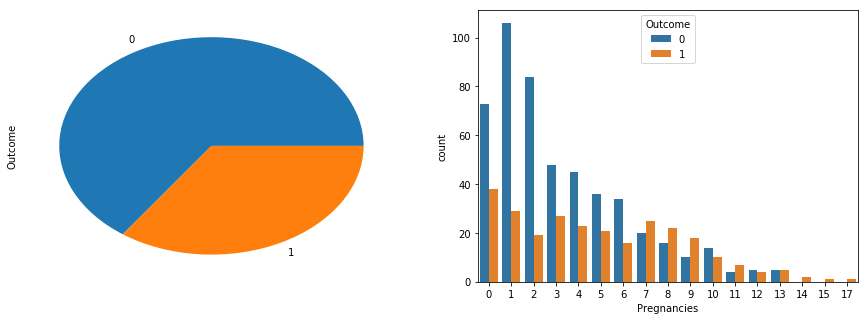

In [9]:
# Target Variable - Outcome - Categorical/Nominal
plt.figure(2, figsize=(15,5))
plt.subplot(121)
data['Outcome'].value_counts().plot(kind='pie')
plt.subplot(122)
sns.countplot(x='Pregnancies', hue='Outcome', data=data)

# The target variable class is imbalanced, as Majority:Minority (ie. Non-diabetics:Diabetics) ratios are ~2:1. 
# But the imbalance is expected.
# ~80% of the data is present in the range 0-6 pregnancies
# Maximum # of pregnancies is 1.
# Even at 0 pregnancies, the diabetics in sample data are more than 50%

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026709AA9710>,
      dtype=object)

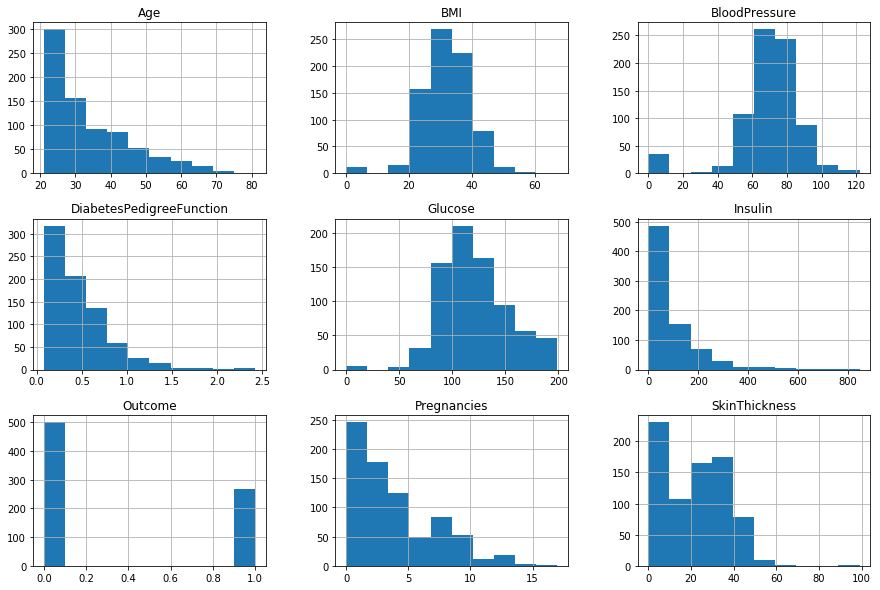

In [10]:
# Univariate Analysis
# Lets look at the distribution of data in various columns
data.hist(figsize=(15,10))

# Some attributes, such as BMI, BP, Glucose, SkinThickness look normally distributed
# Some attributes, such as Age, DiaPedigree, Insulin & Pregnancies may have an exponential distribution

In [11]:
# Create 2 dfs to hold Diabetics/Non-diabetics data seperately for comparison charts
diabetics = data[data['Outcome']==1]
nondiabetics = data[data['Outcome']==0]

In [12]:
diabetics.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [13]:
nondiabetics.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


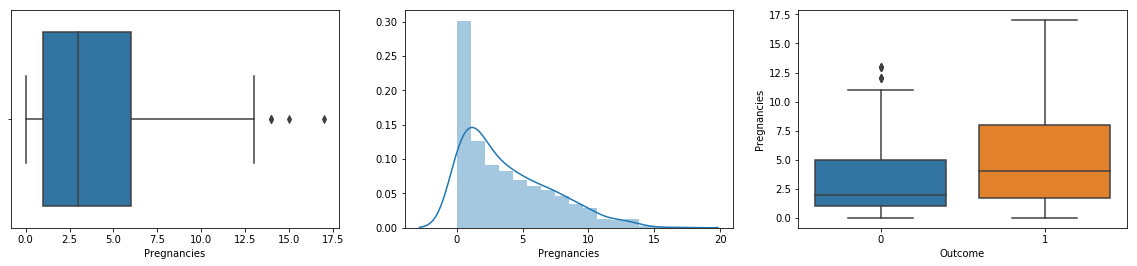

In [14]:
# Pregnancies Column - Numerical/Discrete
plt.figure(1, figsize=(20,4))
plt.subplot(131)
sns.boxplot(x='Pregnancies', data=data)
plt.subplot(132)
sns.distplot(data['Pregnancies'])
plt.subplot(133)
#sns.countplot(x='Pregnancies', hue='Outcome', data=data)
sns.boxplot(y='Pregnancies', x='Outcome', data=data)

# Maximum number of women are present in the 0-3 pregnancies range, 424/768, 55%
# Data is right-skewed. Need to convert into normal distribution.
# Avg. Pregnancies is higher in Diabetics than non-diabetics
# Outliers present in non-diabetics. But the data seems correct. So imputation not needed.

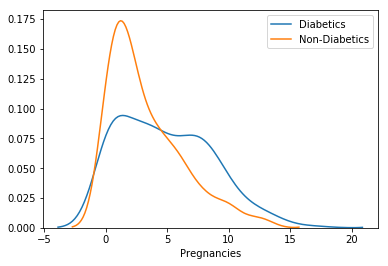

In [15]:
# Look at the Probability Density Function
sns.distplot(diabetics['Pregnancies'], kde=True, hist=False, label='Diabetics')
sns.distplot(nondiabetics['Pregnancies'], kde=True, hist=False, label='Non-Diabetics')

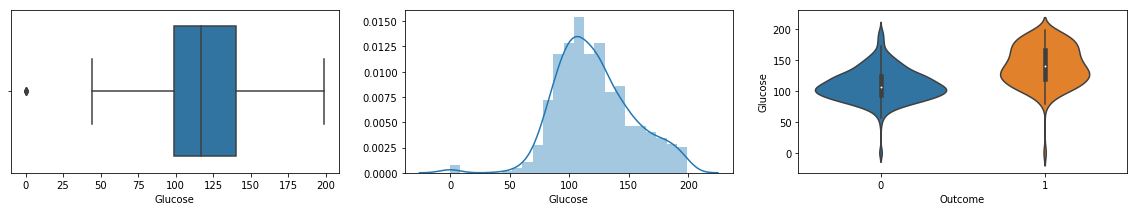

In [16]:
# Glucose Column - Numerical/Continuous
plt.figure(1, figsize=(20,3))
plt.subplot(131)
sns.boxplot(x='Glucose', data=data)
plt.subplot(132)
sns.distplot(data['Glucose'])
plt.subplot(133)
sns.violinplot(x='Outcome', y='Glucose', data=data)

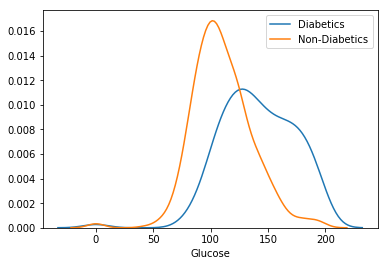

In [17]:
# Look at the Probability Density Function
sns.distplot(diabetics['Glucose'], kde=True, hist=False, label='Diabetics')
sns.distplot(nondiabetics['Glucose'], kde=True, hist=False, label='Non-Diabetics')

# Based on statistical comparison, Glucose Mean for non-diabetics & diabetics is 110 & 141 resp.
# Glucose levels are a clear indicator of Diabetics and Non-diabetics
# Ouliers seen due to 0 values, missing glucose values
# -ve skew due to 0s

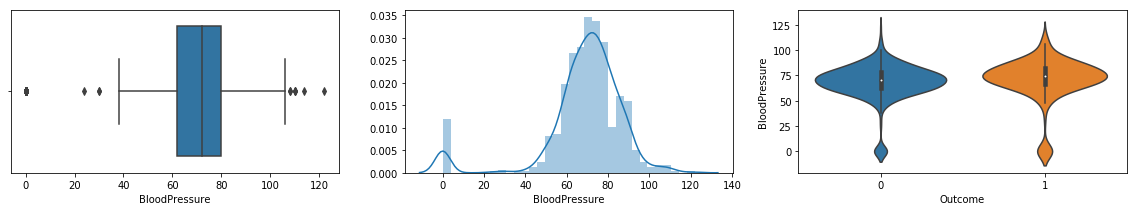

In [18]:
# BloodPressure Column - Numerical/Continuous
plt.figure(1, figsize=(20,3))
plt.subplot(131)
sns.boxplot(x='BloodPressure', data=data)
plt.subplot(132)
sns.distplot(data['BloodPressure'])
plt.subplot(133)
sns.violinplot(x='Outcome', y='BloodPressure', data=data)

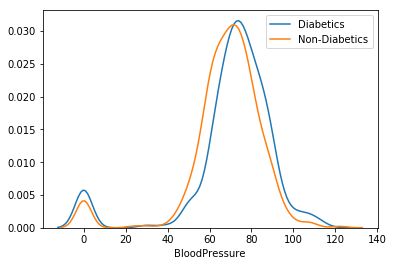

In [19]:
# Look at the Probability Density Function
sns.distplot(diabetics['BloodPressure'], kde=True, hist=False, label='Diabetics')
sns.distplot(nondiabetics['BloodPressure'], kde=True, hist=False, label='Non-Diabetics')

# Several Outliers on either side of the whiskers. There are several BP=0, missing data which needs to be imputed.
# Bimodal distribution due to a large number of BP=0, missing values, otherwise close to normal distribution
# There is no significant difference in the mean for Diabetics & Non-diabetics:70 and 68 respectively, hence it does not give any clear indication.
# No significant difference in Median either, so only one median can be used for imputations

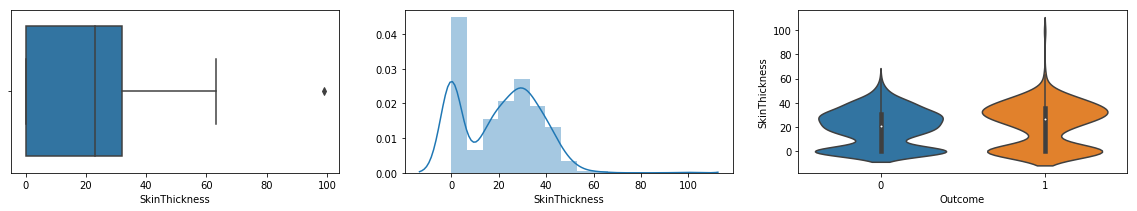

In [20]:
# SkinThickness Column - Numerical/Continuous
plt.figure(1, figsize=(20,3))
plt.subplot(131)
sns.boxplot(x='SkinThickness', data=data)
plt.subplot(132)
sns.distplot(data['SkinThickness'])
plt.subplot(133)
sns.violinplot(x='Outcome', y='SkinThickness', data=data)

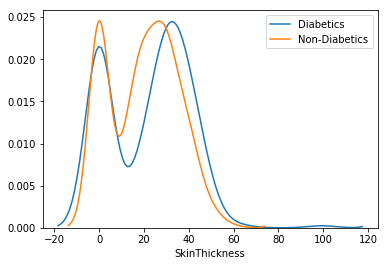

In [21]:
# Look at the Probability Density Function
sns.distplot(diabetics['SkinThickness'], kde=True, hist=False, label='Diabetics')
sns.distplot(nondiabetics['SkinThickness'], kde=True, hist=False, label='Non-Diabetics')

# Several outliers on either side of whiskers. But since they are gradual, need to look to understand if they need to be imputed.
# The values are tightly concentrated around the median, with a small interquartile range
# The avg skin thickness for Diabetic women is 22mm, and 19mm for Non-Diabetic Women.

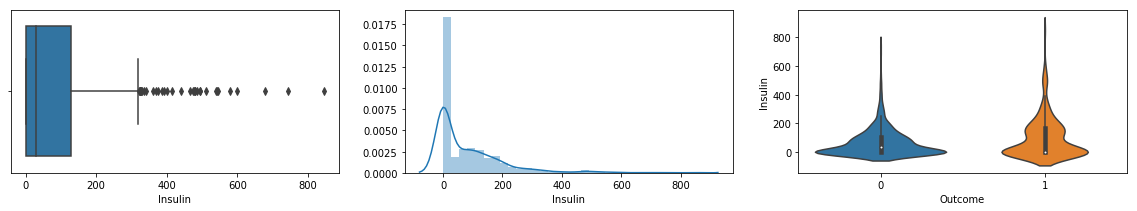

In [22]:
# Insulin Column - Numerical/Continuous
plt.figure(1, figsize=(20,3))
plt.subplot(131)
sns.boxplot(x='Insulin', data=data)
plt.subplot(132)
sns.distplot(data['Insulin'])
plt.subplot(133)
sns.violinplot(x='Outcome', y='Insulin', data=data)

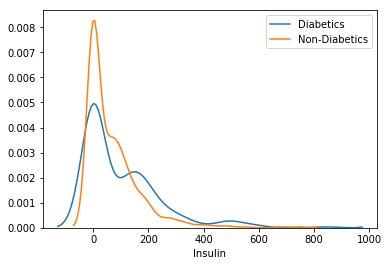

In [23]:
# Look at the Probability Density Function
sns.distplot(diabetics['Insulin'], kde=True, hist=False, label='Diabetics')
sns.distplot(nondiabetics['Insulin'], kde=True, hist=False, label='Non-Diabetics')

# Since insulin values can not be 0, and the number of insulin=0 values are large, imputation is needed before drawingconclusion
# Mean Insulin levels in diabetics is 100 vs 68 in non-diabetics. This is significant.

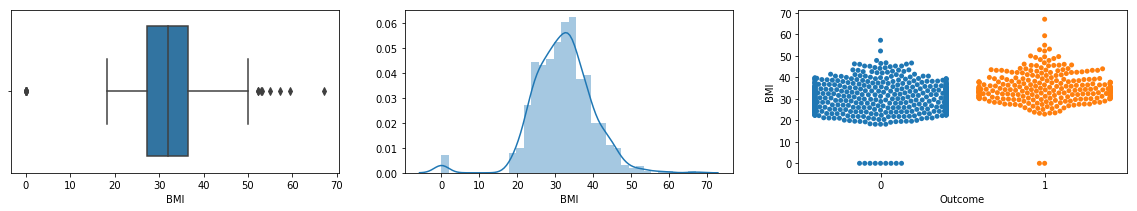

In [24]:
# BMI Column - Numerical/Continuous
plt.figure(1, figsize=(20,3))
plt.subplot(131)
sns.boxplot(x='BMI', data=data)
plt.subplot(132)
sns.distplot(data['BMI'])
plt.subplot(133)
sns.swarmplot(data['Outcome'], data['BMI'])
#sns.violinplot(x='Outcome', y='BMI', data=data)

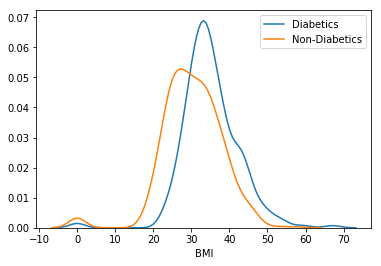

In [25]:
# Look at the Probability Density Function
sns.distplot(diabetics['BMI'], kde=True, hist=False, label='Diabetics')
sns.distplot(nondiabetics['BMI'], kde=True, hist=False, label='Non-Diabetics')

# Some outliers present. 0s have to be imputed as BMI cannot be 0.
# Data is distributed pretty normally
# Mean BMI in diabetics is 35 vs 30 in non-diabetics. This is significant.

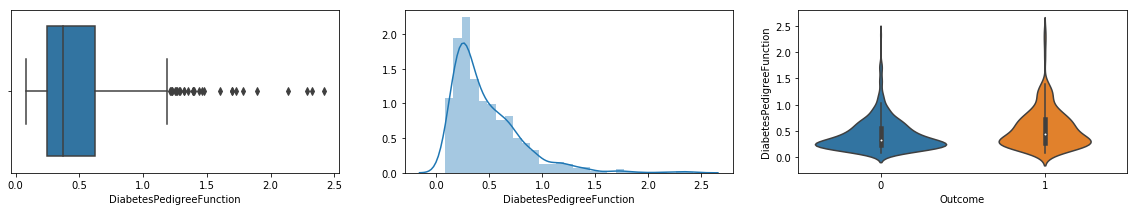

In [26]:
# DiabetesPedigreeFunction Column - Numerical/Continuous
plt.figure(1, figsize=(20,3))
plt.subplot(131)
sns.boxplot(x='DiabetesPedigreeFunction', data=data)
plt.subplot(132)
sns.distplot(data['DiabetesPedigreeFunction'])
plt.subplot(133)
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=data)

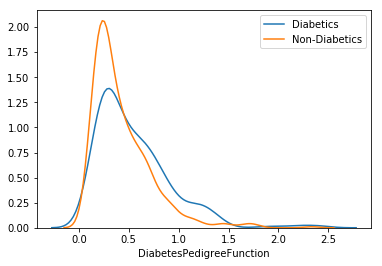

In [27]:
# Look at the Probability Density Function
sns.distplot(diabetics['DiabetesPedigreeFunction'], kde=True, hist=False, label='Diabetics')
sns.distplot(nondiabetics['DiabetesPedigreeFunction'], kde=True, hist=False, label='Non-Diabetics')

# No values are 0. Outliers beyond the upper whisker. Need to check if they need to be imputed.
# Mean Insulin levels in diabetics is 0.55 vs 0.43 in non-diabetics. Values are close.

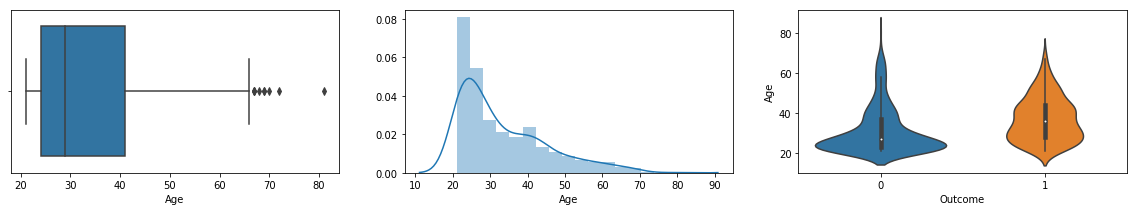

In [28]:
# Age Column - Numerical/Continuous
plt.figure(1, figsize=(20,3))
plt.subplot(131)
sns.boxplot(x='Age', data=data)
plt.subplot(132)
sns.distplot(data['Age'])
plt.subplot(133)
sns.violinplot(x='Outcome', y='Age', data=data)

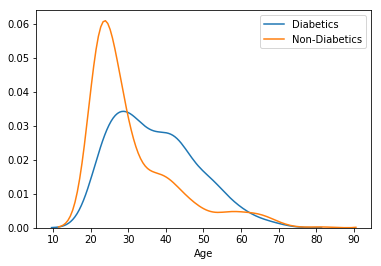

In [29]:
# Look at the Probability Density Function
sns.distplot(diabetics['Age'], kde=True, hist=False, label='Diabetics')
sns.distplot(nondiabetics['Age'], kde=True, hist=False, label='Non-Diabetics')

# Outliers on the upper whisker.
# Right skewed
# Mean age of Diabetic women is around 37 vs 31 for Non-Diabetic women. Chances of Diabetes increase with Age.

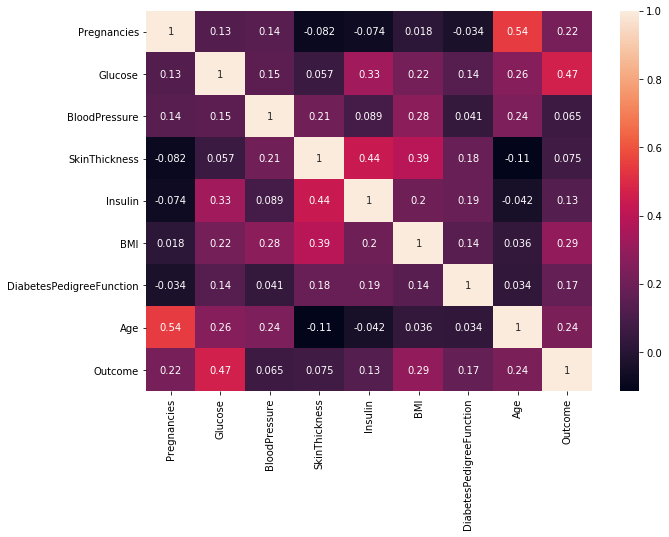

In [30]:
# Heatmap to see correlation between each and every column
plt.subplots(figsize = (10,7))
sns.heatmap(data.corr(), annot=True)

# Based on the correlation coeffecients of BMI at 0.29 and Age at 0.24 with outcome, 
# we can infer that greater the BMI and Age, more the chances of getting TypeII Diabetes
# There is no strong correlation between diabetes and pedigree. May mean that it is not hereditary or thr pedigree Function is not very accurate.

### Data Cleaning and Imputation

In [31]:
# Though there are no null values in the data, there are several 0s in each column
for col in data.columns:
    print(col, data[data[col]==0][col].count())

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [32]:
# Glucose data cleanup
data[(data['Glucose']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [33]:
# Since there are no oultiers other than 0, we can use the mean for imputation
# Get the mean glucose value for diabtics and non-diabetics
avg_gl_nondia = data[(data['Outcome']==0) & (data['Glucose']!=0)]['Glucose'].mean()
avg_gl_dia = data[(data['Outcome']==1) & (data['Glucose']!=0)]['Glucose'].mean()

# Replace Zero Values
data.loc[(data['Glucose']==0) & (data['Outcome']==0), 'Glucose'] = avg_gl_nondia
data.loc[(data['Glucose']==0) & (data['Outcome']==1), 'Glucose'] = avg_gl_dia

In [34]:
# Check to make sure all missing glucose values have been successfully imputed
data[(data['Glucose']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [35]:
# Verify no other columns affected
for col in data.columns:
    print(col, data[data[col]==0][col].count())

Pregnancies 111
Glucose 0
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [36]:
# Blood Pressure data cleanup
# Impute BP=0 values with median, as it is least affected by the several outliers in this field
len(data[data['BloodPressure']==0]) # 35 data points have BP=0

35

In [37]:
# Since there are outliers, get the median BP for diabetics and non-diabetics
median_bp_nondia = data[(data['Outcome']==0) & (data['BloodPressure']!=0)]['BloodPressure'].median()
median_bp_dia = data[(data['Outcome']==1) & (data['BloodPressure']!=0)]['BloodPressure'].median()

print('Median BP for Non-diabetics -', median_bp_nondia)
print('Median BP for Diabetics -', median_bp_dia)

# Replace Zero Values
data.loc[(data['BloodPressure']==0) & (data['Outcome']==0), 'BloodPressure'] = median_bp_nondia
data.loc[(data['BloodPressure']==0) & (data['Outcome']==1), 'BloodPressure'] = median_bp_dia

Median BP for Non-diabetics - 70.0
Median BP for Diabetics - 74.5


In [38]:
# Check to make sure all BP=0 values have been successfully imputed
len(data[data['BloodPressure']==0])

# Verified that no other columns were affected

0

In [39]:
# Examine the BP outliers
Q1 = data['BloodPressure'].quantile(q=0.25)
Q3 = data['BloodPressure'].quantile(q=0.75)
BP_IQR = Q3-Q1
print(BP_IQR)
print('Lower Limit -', Q1 - 1.5*BP_IQR)
print('Upper Limit -', Q3 + 1.5*BP_IQR)
bp_outliers = data[(data['BloodPressure'] < (Q1 - 1.5*BP_IQR)) | (data['BloodPressure'] > (Q3 + 1.5*BP_IQR))]

16.0
Lower Limit - 40.0
Upper Limit - 104.0


In [40]:
bp_outliers  #[bp_outliers['Outcome']==0]
# Observing the data just before and after the limits, none of these point look like they are incorrect. 
# But since they are outliers, these will be imputed with the BP median values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103.0,30.0,38,83,43.3,0.183,33,0
43,9,171.0,110.0,24,240,45.4,0.721,54,1
84,5,137.0,108.0,0,0,48.8,0.227,37,1
106,1,96.0,122.0,0,0,22.4,0.207,27,0
125,1,88.0,30.0,42,99,55.0,0.496,26,1
177,0,129.0,110.0,46,130,67.1,0.319,26,1
362,5,103.0,108.0,37,0,39.2,0.305,65,0
549,4,189.0,110.0,31,0,28.5,0.680,37,0
597,1,89.0,24.0,19,25,27.8,0.559,21,0
599,1,109.0,38.0,18,120,23.1,0.407,26,0


In [41]:
# Change all BP Outlier records to the BP median values
data.loc[((data['BloodPressure'] < (Q1 - 1.5*BP_IQR)) | (data['BloodPressure'] > (Q3 + 1.5*BP_IQR))) & (data['Outcome']==0), 'BloodPressure'] = median_bp_nondia
data.loc[((data['BloodPressure'] < (Q1 - 1.5*BP_IQR)) | (data['BloodPressure'] > (Q3 + 1.5*BP_IQR))) & (data['Outcome']==1), 'BloodPressure'] = median_bp_dia

In [42]:
# Verify that all the BP outlier records are changed to the BP median values
data[(data['BloodPressure'] < (Q1 - 1.5*BP_IQR)) | (data['BloodPressure'] > (Q3 + 1.5*BP_IQR))]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [43]:
# Impute Skin Thickness=0 values
len(data[data['SkinThickness']==0])

227

In [44]:
# Impute SkinThickness=0 values with median since there are outliers
median_st_nondia = data[(data['Outcome']==0) & (data['SkinThickness']!=0)]['SkinThickness'].median()
median_st_dia = data[(data['Outcome']==1) & (data['SkinThickness']!=0)]['SkinThickness'].median()

print('Median SkinThickness for Non-diabetics -', median_st_nondia)
print('Median SkinThickness for Diabetics -', median_st_dia)

# Replace Zero Values
data.loc[(data['SkinThickness']==0) & (data['Outcome']==0), 'SkinThickness'] = median_st_nondia
data.loc[(data['SkinThickness']==0) & (data['Outcome']==1), 'SkinThickness'] = median_st_dia

Median SkinThickness for Non-diabetics - 27.0
Median SkinThickness for Diabetics - 32.0


In [45]:
# Check if all the SkinThickness=0 values are updated
len(data[data['SkinThickness']==0])

0

In [46]:
# Examine the SkinThickness outliers
Q1 = data['SkinThickness'].quantile(q=0.25)
Q3 = data['SkinThickness'].quantile(q=0.75)
ST_IQR = Q3-Q1
print(ST_IQR)
print('Lower Limit -', Q1 - 1.5*ST_IQR)
print('Upper Limit -', Q3 + 1.5*ST_IQR)

st_outliers = data[(data['SkinThickness'] < (Q1 - 1.5*ST_IQR)) | (data['SkinThickness'] > (Q3 + 1.5*ST_IQR))]

7.0
Lower Limit - 14.5
Upper Limit - 42.5


In [47]:
# List all the outliers
st_outliers

# Since the IQR is very small and the data is mostly concentrated around the median, we are seeing a lot of outliers.
# However, we will impute only Row# 2, which has a value of 99.

data.loc[data['SkinThickness']==99, 'SkinThickness'] = median_st_dia

In [48]:
data[data['SkinThickness']==99]
#sns.violinplot(x='Outcome', y='SkinThickness', data=data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


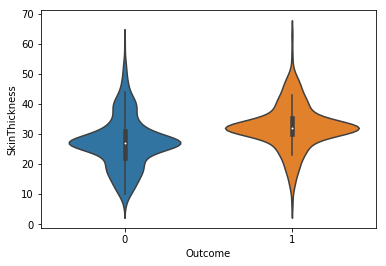

In [49]:
sns.violinplot(x='Outcome', y='SkinThickness', data=data)

In [50]:
# Impute Insulin=0 values
len(data[data['Insulin']==0])

374

In [51]:
# Impute Insulin=0 values with median as there are several outliers
median_ins_nondia = data[(data['Outcome']==0) & (data['Insulin']!=0)]['Insulin'].median()
median_ins_dia = data[(data['Outcome']==1) & (data['Insulin']!=0)]['Insulin'].median()

print('Median Insulin for Non-diabetics -', median_ins_nondia)
print('Median Insulin for Diabetics -', median_ins_dia)

# Replace Zero Values
data.loc[(data['Insulin']==0) & (data['Outcome']==0), 'Insulin'] = median_ins_nondia
data.loc[(data['Insulin']==0) & (data['Outcome']==1), 'Insulin'] = median_ins_dia

Median Insulin for Non-diabetics - 102.5
Median Insulin for Diabetics - 169.5


In [52]:
# Check if all Insulin=0 values have been updated
len(data[data['Insulin']==0])

0

In [53]:
# Examine the Insulin outliers
Q1 = data['Insulin'].quantile(q=0.25)
Q3 = data['Insulin'].quantile(q=0.75)
INS_IQR = Q3-Q1
print(INS_IQR)
print('Lower Limit -', Q1 - 1.5*INS_IQR)
print('Upper Limit -', Q3 + 1.5*INS_IQR)

ins_outliers = data[(data['Insulin'] < (Q1 - 1.5*INS_IQR)) | (data['Insulin'] > (Q3 + 1.5*INS_IQR))]

67.0
Lower Limit - 2.0
Upper Limit - 270.0


In [54]:
len(ins_outliers) # 51 outliers

51

In [55]:
# Since the IQR is very small and the data is mostly concentrated around the median, we are seeing a lot of outliers.
# However, we will impute only 4 rows which have values of 600, 680, 744 & 846

data.loc[(data['Insulin'] == 600), 'Insulin'] = median_ins_dia
data.loc[(data['Insulin'] == 846), 'Insulin'] = median_ins_dia
data.loc[(data['Insulin'] == 680), 'Insulin'] = median_ins_nondia
data.loc[(data['Insulin'] == 744), 'Insulin'] = median_ins_nondia

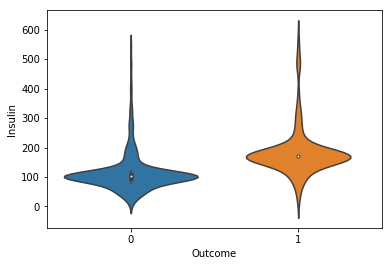

In [56]:
sns.violinplot(x='Outcome', y='Insulin', data=data)
# The data is not concentrated around Insulin=0 anymore

In [57]:
# Impute BMI=0 values
len(data[data['BMI']==0])

11

In [58]:
# Impute BMI=0 values with median as there are several outliers
median_bmi_nondia = data[(data['Outcome']==0) & (data['BMI']!=0)]['BMI'].median()
median_bmi_dia = data[(data['Outcome']==1) & (data['BMI']!=0)]['BMI'].median()

print('Median BMI for Non-diabetics -', median_bmi_nondia)
print('Median BMI for Diabetics -', median_bmi_dia)

# Replace Zero values
data.loc[(data['BMI']==0) & (data['Outcome']==0), 'BMI'] = median_bmi_nondia
data.loc[(data['BMI']==0) & (data['Outcome']==1), 'BMI'] = median_bmi_dia

Median BMI for Non-diabetics - 30.1
Median BMI for Diabetics - 34.3


In [59]:
# Check if BMI=0 values are updated
len(data[data['BMI']==0])

0

In [60]:
# Examine the BMI outliers
Q1 = data['BMI'].quantile(q=0.25)
Q3 = data['BMI'].quantile(q=0.75)
BMI_IQR = Q3-Q1
print(BMI_IQR)
print('Lower Limit -', Q1 - 1.5*BMI_IQR)
print('Upper Limit -', Q3 + 1.5*BMI_IQR)

bmi_outliers = data[(data['BMI'] < (Q1 - 1.5*BMI_IQR)) | (data['BMI'] > (Q3 + 1.5*BMI_IQR))]

9.100000000000001
Lower Limit - 13.849999999999998
Upper Limit - 50.25


In [61]:
bmi_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
125,1,88.0,74.5,42.0,99.0,55.0,0.496,26,1
177,0,129.0,74.5,46.0,130.0,67.1,0.319,26,1
193,11,135.0,74.5,32.0,169.5,52.3,0.578,40,1
247,0,165.0,90.0,33.0,102.5,52.3,0.427,23,0
303,5,115.0,98.0,32.0,169.5,52.9,0.209,28,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
673,3,123.0,100.0,35.0,240.0,57.3,0.880,22,0


In [62]:
# Only BMI = 67.1 is a far outlier. Other values are gradual. So replacing only that.

data.loc[(data['BMI'] == 67.1), 'BMI'] = median_bmi_dia
# Verified that that 1 row has been updated

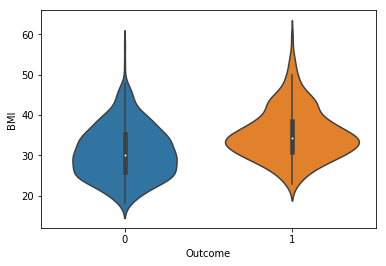

In [63]:
sns.violinplot(x='Outcome', y='BMI', data=data)

In [64]:
import scipy.stats as stats
age_IQR = stats.iqr(data['Age'])

In [65]:
age_outliers = data[(data['Age'] < (Q1 - 1.5*age_IQR)) | (data['Age'] > (Q3 + 1.5*age_IQR))]
age_outliers
# The Age outliers are all continuous and no sudden jumps. Hence no imputation needed.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132.0,80.0,27.0,102.5,26.8,0.186,69,0
148,5,147.0,78.0,27.0,102.5,33.7,0.218,65,0
221,2,158.0,90.0,32.0,169.5,31.6,0.805,66,1
263,3,142.0,80.0,15.0,102.5,32.4,0.200,63,0
294,0,161.0,50.0,27.0,102.5,21.9,0.254,65,0
361,5,158.0,70.0,27.0,102.5,29.8,0.207,63,0
362,5,103.0,70.0,37.0,102.5,39.2,0.305,65,0
363,4,146.0,78.0,32.0,169.5,38.5,0.520,67,1
453,2,119.0,70.0,27.0,102.5,19.6,0.832,72,0
459,9,134.0,74.0,33.0,60.0,25.9,0.460,81,0


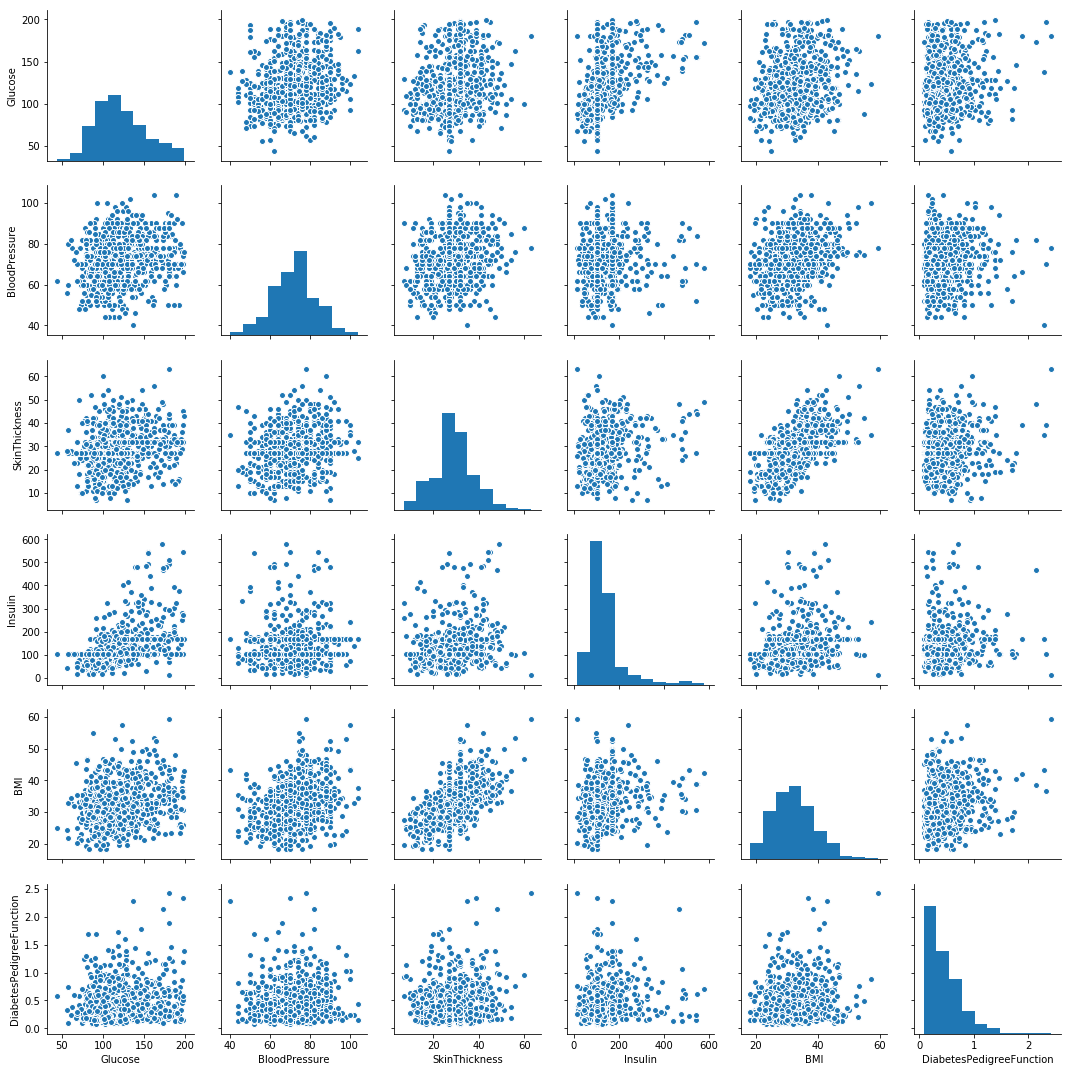

In [66]:
# Create a pair-plot to study relation between continuous vars. 
sns.pairplot(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']])

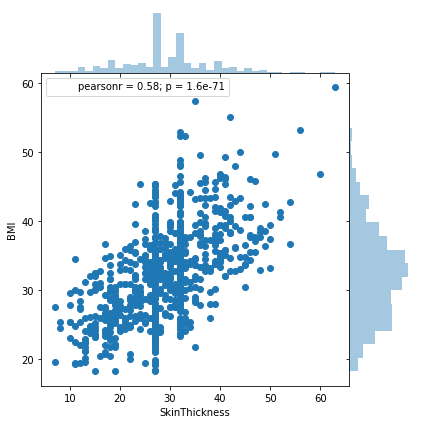

In [67]:
# BMI and SkinThickness are positively corelated
sns.jointplot(data['SkinThickness'], data['BMI'], space=0)

### Remove right skew from certain columns to make them more normally distributed

In [68]:
# Insulin and Diabetes Pedigree Function distributions are both right skewed.
# Use log function to bring them to a normal form
data['Log_Insulin'] = np.log(data['Insulin'])
data['Log_DiabetesPedigreeFunction'] = np.log(data['DiabetesPedigreeFunction'])

In [69]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Log_Insulin,Log_DiabetesPedigreeFunction
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,5.132853,-0.466809
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,4.629863,-1.046969
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,5.132853,-0.397497
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,4.543295,-1.789761
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,5.123964,0.827678


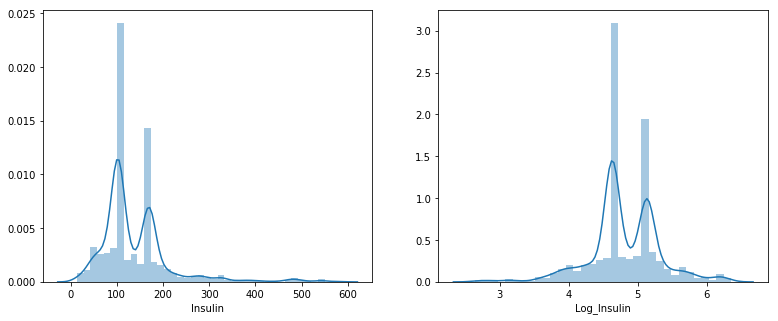

In [70]:
# Plot of log Insulin
plt.figure(1, figsize=(13, 5))
plt.subplot(121)
sns.distplot(data['Insulin'])
plt.subplot(122)
sns.distplot(data['Log_Insulin'])
# Positive skew changed to negative skew. So this is not appropriate for further analysis.

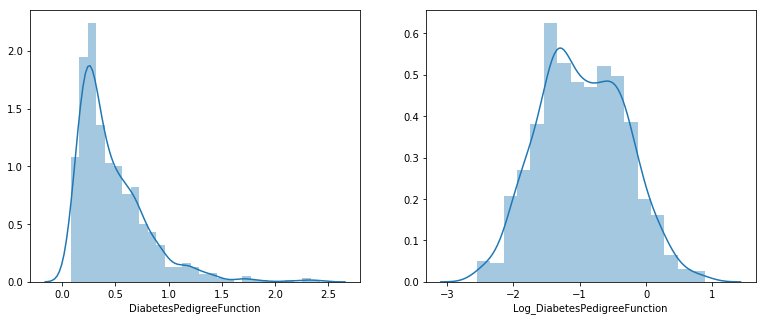

In [71]:
# Plot of log DiabetesPedigreeFunction
plt.figure(1, figsize=(13, 5))
plt.subplot(121)
sns.distplot(data['DiabetesPedigreeFunction'])
plt.subplot(122)
sns.distplot(data['Log_DiabetesPedigreeFunction'])
# Right skew has been removed. Distribution is more normal.

### Descriptive Analysis of data complete